In [98]:
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pn 
from sklearn.cluster import KMeans , DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


data= pn.read_csv("assignment3-data-1.csv")
psi_phi =data.drop(columns=["residue name","position","chain"],index=1)

# plt.scatter(data["phi"], data["psi"],s=1)
psi_phi.to_numpy()
psi_phi


,phi,psi
0,-149.312855,142.657714
2,-119.972621,-168.705263
3,-135.317212,137.143523
4,-104.851467,95.928520
5,-91.504388,123.866914
...,...,...
29364,-147.749557,155.223562
29365,-117.428541,133.019506
29366,-113.586448,112.091970
29367,-100.668779,-12.102821


<AxesSubplot:>

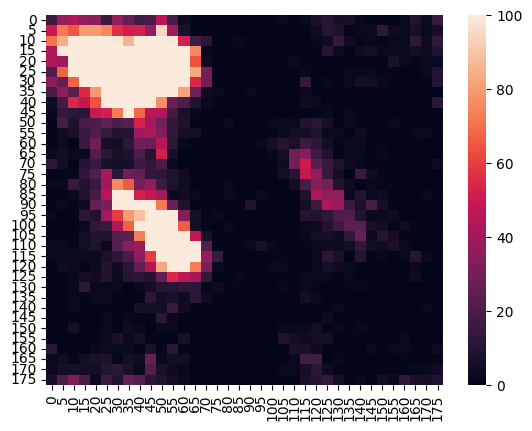

In [166]:





heat_counter_m= np.zeros((36, 36))
for ps, ph in zip(psi_phi["phi"],psi_phi["psi"]):
    heat_counter_m[int(-(ph+180)/10),(int((ps+180)/10))] += 1


sns.heatmap(
    heat_counter_m, 
    xticklabels= range(0,180,5), 
    yticklabels= range(0,180,5), 
    vmin=0, 
    vmax=100
)


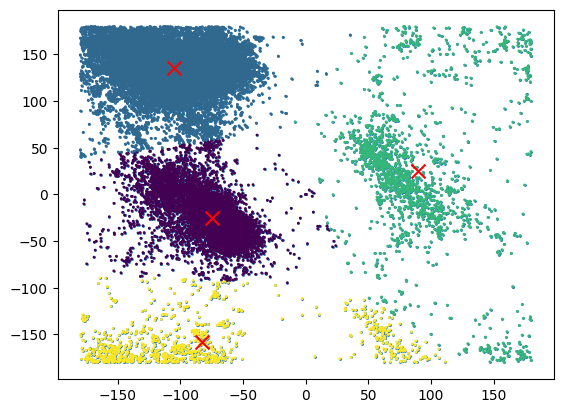

In [167]:

#2 
kmeans = KMeans(n_clusters=4,random_state=50).fit(psi_phi)

plt.scatter(data["phi"], data["psi"],s=1)
plt.scatter(psi_phi["phi"], psi_phi["psi"],s=1,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=100)





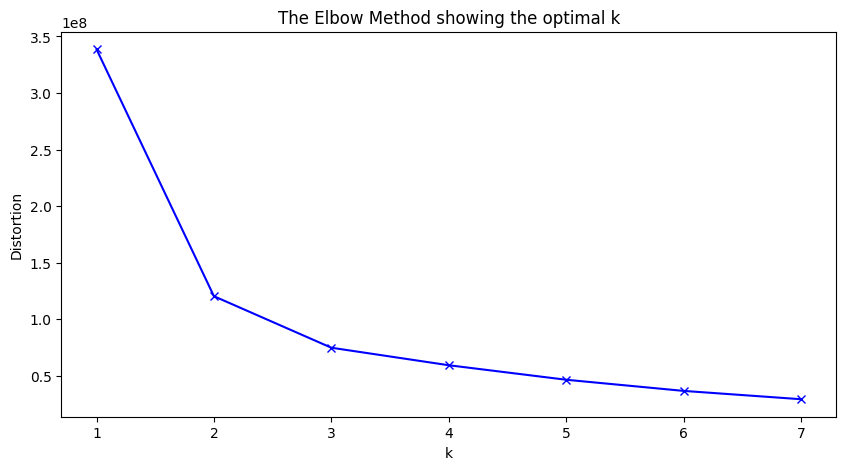

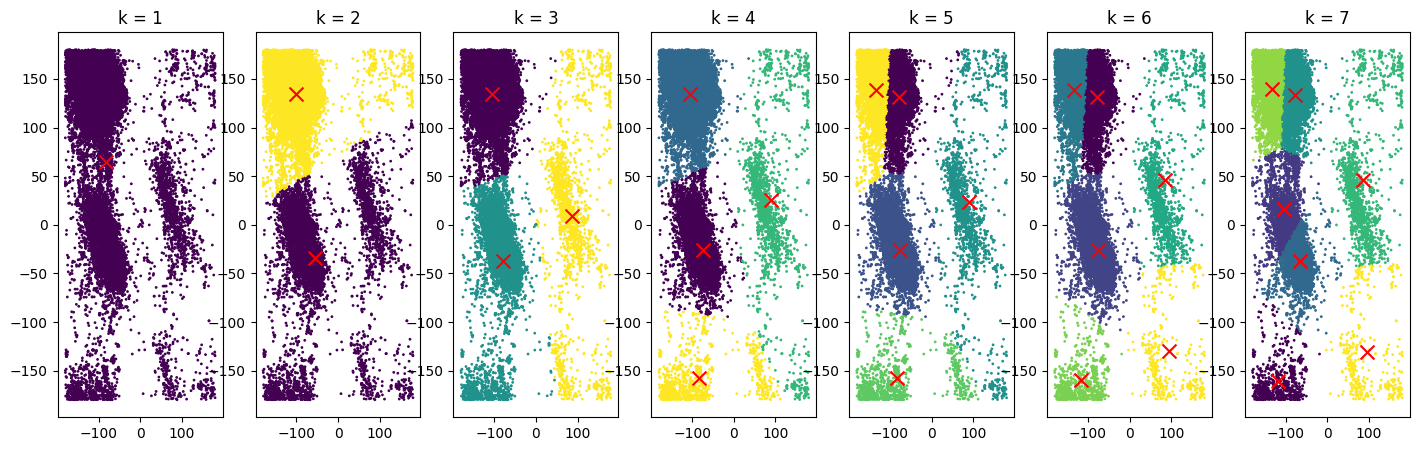

In [178]:
#elbow

x = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(psi_phi)
    x.append(kmeanModel.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, x, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



plt.figure(figsize=(20,5))
for k in range(1,8):
    kmeans = KMeans(n_clusters=k ).fit(psi_phi)
    
    plt.subplot(1,8,k)
    plt.title(f"k = {k}")
    # plt.scatter(data["phi"], data["psi"],s=1)
    plt.scatter(psi_phi["phi"], psi_phi["psi"],s=1,c = kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=100)







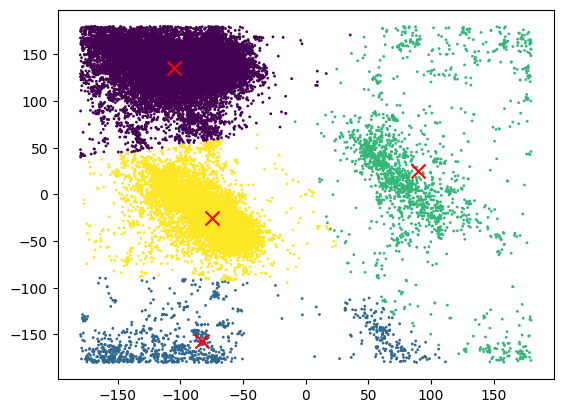

In [169]:

kmeans = KMeans(n_clusters=4 ).fit(psi_phi)

plt.scatter(psi_phi["phi"], psi_phi["psi"],s=1,c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=100)


In [170]:
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=25, min_samples=85).fit(psi_phi)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)



# #best is 25,85
# db = DBSCAN(eps=25,min_samples=85).fit(psi_phi)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters = : %d' %n_clusters_ )
# print('Estimated number of noise points: %d' % n_noise_)


# for esp  in range(5,40,2):
#     for min_sam  in range(70,120,5):
#         db = DBSCAN(eps=esp,min_samples= min_sam).fit(psi_phi)
#         core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#         core_samples_mask[db.core_sample_indices_] = True
#         labels = db.labels_

#         # Number of clusters in labels, ignoring noise if present.
#         n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#         n_noise_ = list(labels).count(-1)       
#         dataz[n_clusters_ ]=([f"esp= {esp} ,minsam {min_sam}"])
#         print(f"esp= {esp}, min_sam {min_sam}")
#         print('Estimated number of clusters,= : %d' %n_clusters_ )
#         print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 578


In [7]:
db.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

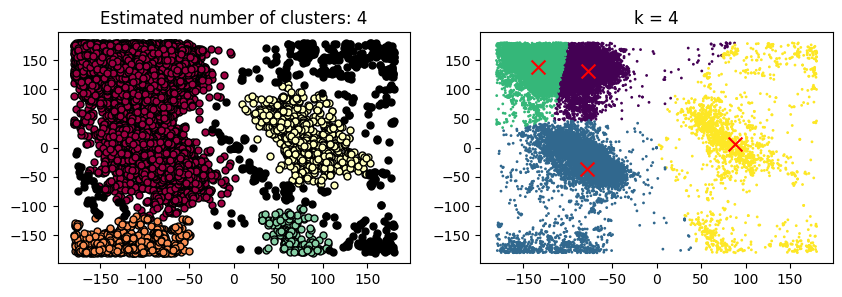

In [199]:

d2d = psi_phi.to_numpy()
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    

    class_member_mask = (labels == k)

    xy = d2d[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = d2d[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)
plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.subplot(1,2,2)
kmeans = KMeans(n_clusters = 4).fit(psi_phi)
plt.title(f"k = 4")
# plt.scatter(data["phi"], data["psi"],s=1)
plt.scatter(psi_phi["phi"], psi_phi["psi"],s=1,c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=100)
plt.subplot(1,2,2)

plt.show()

<BarContainer object of 20 artists>

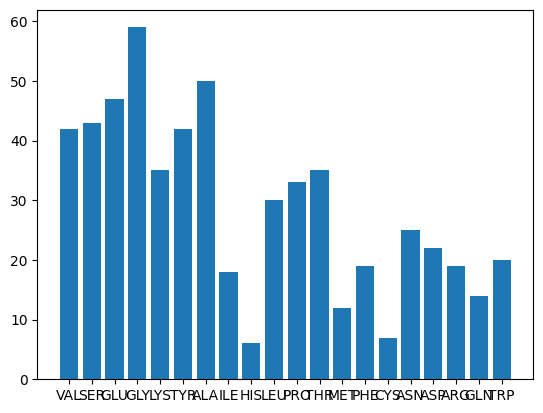

In [79]:
from collections import Counter

outliers = []
for index in range(len(labels)):
    if(labels[index] == -1):
        outliers.append(data.iloc[[index]]['residue name'].values[0])


dataz = Counter(outliers)
plt.bar(dataz.keys() , dataz.values())




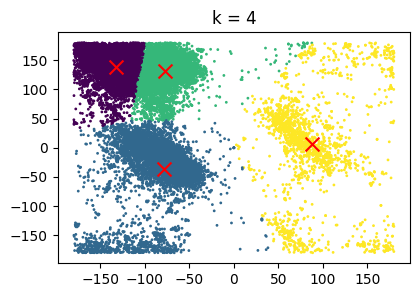

In [198]:
#3.d

plt.figure(figsize=(10,3))
kmeans = KMeans(n_clusters = 4).fit(psi_phi)
plt.subplot(1,2,1)
plt.title(f"k = 4")
# plt.scatter(data["phi"], data["psi"],s=1)
plt.scatter(psi_phi["phi"], psi_phi["psi"],s=1,c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",c="red",s=100)
plt.subplot(1,2,2)
